# Assignment B 2

In [1]:
import pandas as pd

In [2]:
d = pd.read_csv("AirQuality.csv")

In [3]:
d.head(9)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,1,41.0,190.0,7.4,67,5,1,High
1,2,36.0,118.0,8.0,72,5,2,Low
2,3,12.0,149.0,12.6,74,5,3,High
3,4,18.0,313.0,11.5,62,5,4,Medium
4,5,NaN,NaN,14.3,56,5,5,High
5,6,28.0,NaN,14.9,66,5,6,Low
6,7,23.0,299.0,8.6,65,5,7,High
7,8,19.0,99.0,13.8,59,5,8,Medium
8,9,8.0,19.0,20.1,61,5,9,High


In [5]:
d.isnull().sum()

Unnamed: 0     0
Ozone         37
Solar.R        7
Wind           0
Temp           0
Month          0
Day            0
Humidity       4
dtype: int64

## Cleaning the data

In [6]:
df = d.drop('Unnamed: 0', axis = 1)

### Replace numerical null Values

In [7]:
df["Ozone"] = df["Ozone"].fillna(df["Ozone"].mean())

In [8]:
df["Solar.R"] = df["Solar.R"].fillna(df["Solar.R"].mean())

In [9]:
df["Wind"] = df["Wind"].fillna(df["Wind"].mean())

### Replace categorical null values

In [10]:
df["Humidity"] = df["Humidity"].fillna(df["Humidity"].mode()[0])

In [11]:
df.isnull().sum()

Ozone       0
Solar.R     0
Wind        0
Temp        0
Month       0
Day         0
Humidity    0
dtype: int64

## Data Trannsformation

### Label encoding on humidity column

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()

In [14]:
df["Humidity"] = le.fit_transform(df["Humidity"])

In [15]:
df["Humidity"].unique()

array([0, 1, 2])

## Data Integration

### Creating Row wise subset

In [18]:
subset1 = df.iloc[[1, 2, 3, 6, 12, 28, 30, 35],:]

In [19]:
subset1

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
1,36.00000,118.0,8.0,72,5,2,1
2,12.00000,149.0,12.6,74,5,3,0
3,18.00000,313.0,11.5,62,5,4,2
6,23.00000,299.0,8.6,65,5,7,0
12,11.00000,290.0,9.2,66,5,13,0
28,45.00000,252.0,14.9,81,5,29,0
30,37.00000,279.0,7.4,76,5,31,0
35,42.12931,220.0,8.6,85,6,5,2


In [20]:
subset2 = df.iloc[[71, 82, 94, 104, 125, 136, 150], :]

In [21]:
subset2

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
71,42.12931,139.0,8.6,82,7,11,2
82,42.12931,258.0,9.7,81,7,22,0
94,16.00000,77.0,7.4,82,8,3,0
104,28.00000,273.0,11.5,82,8,13,0
125,73.00000,183.0,2.8,93,9,3,1
136,9.00000,24.0,10.9,71,9,14,0
150,14.00000,191.0,14.3,75,9,28,0


In [22]:
merge = pd.concat([subset1, subset2])

In [23]:
merge

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
1,36.00000,118.0,8.0,72,5,2,1
2,12.00000,149.0,12.6,74,5,3,0
3,18.00000,313.0,11.5,62,5,4,2
6,23.00000,299.0,8.6,65,5,7,0
12,11.00000,290.0,9.2,66,5,13,0
28,45.00000,252.0,14.9,81,5,29,0
30,37.00000,279.0,7.4,76,5,31,0
35,42.12931,220.0,8.6,85,6,5,2
71,42.12931,139.0,8.6,82,7,11,2
82,42.12931,258.0,9.7,81,7,22,0


### Correalation between columns

In [24]:
corr = df.corr()

In [25]:
corr

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
Ozone,1.000000,0.302970,-0.530936,0.608742,0.149081,-0.011355,-0.012681
Solar.R,0.302970,1.000000,-0.055245,0.262569,-0.072904,-0.145621,-0.020428
Wind,-0.530936,-0.055245,1.000000,-0.457988,-0.178293,0.027181,0.090264
Temp,0.608742,0.262569,-0.457988,1.000000,0.420947,-0.130593,0.008397
Month,0.149081,-0.072904,-0.178293,0.420947,1.000000,-0.007962,0.043569
Day,-0.011355,-0.145621,0.027181,-0.130593,-0.007962,1.000000,-0.038271
Humidity,-0.012681,-0.020428,0.090264,0.008397,0.043569,-0.038271,1.000000


In [26]:
import seaborn as sns

<Axes: >

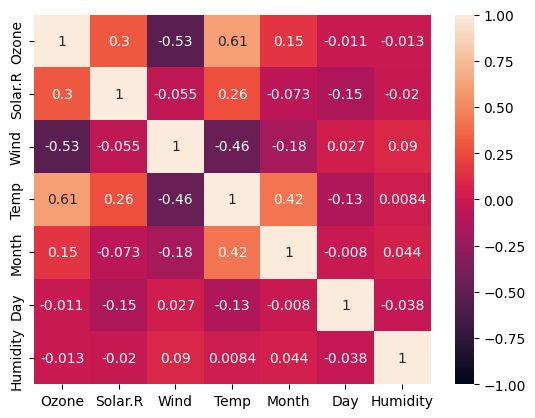

In [28]:
sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)

## Model Building

In [29]:
x = df[["Ozone"]]
y = df[["Temp"]]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr = LinearRegression()

In [34]:
model = lr.fit(xtrain, ytrain)

In [35]:
ypredict = model.predict(xtest)

In [36]:
import matplotlib.pyplot as plt

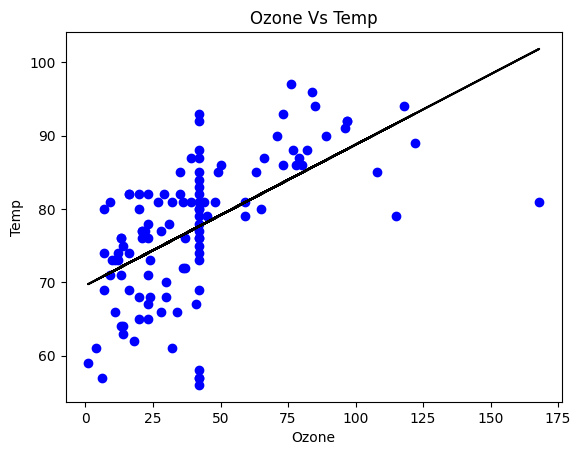

In [37]:
plt.scatter(xtrain, ytrain, color = "blue")
plt.plot(xtrain, lr.predict(xtrain), color = "black")
plt.xlabel("Ozone")
plt.ylabel("Temp")
plt.title("Ozone Vs Temp")
plt.show()

In [38]:
import numpy as np

In [42]:
from sklearn.metrics import mean_absolute_error, r2_score

In [43]:
from sklearn.metrics import mean_squared_error

In [45]:
MAE = mean_absolute_error(ytest, ypredict)
r2_score = r2_score(ytest, ypredict)

In [46]:
print("MAE: ", MAE)
print("r2 score: ", r2_score)

MAE:  5.417567458030409
r2 score:  0.4132767384216013
